# Investigating Factors of Rising House Values in New York City: Step 3: Machine Learning

Team Members: Francisco Brady (fbrady), Zhonghan Xie (jonasxie), Michael Garner (mngarner)  
Date: 2024-12-02

## Introduction

In this section, we seek to apply clustering machine learning techniques to the combined New York City housing price, education, eviction, and demographic dataset in order to identify patterns and relationships between these phenomena. 

In [111]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [112]:
# Import merged neighborhood-level dataset
allData = pd.read_csv('./data/analytic_dataset.csv')

## Preprocessing
- Data cleaning and handling of issues: 20 points
- Feature scaling and normalization; one-hot encoding/categorical variable handling: 20 points
- Dimensionality reduction techniques: 20 points
- Preprocessing justification and impact analysis: 20 points

In [113]:
# Streamline dataset to keep columns of interest for this analysis
keepCols = ['year', 'nta_name', 'borough', 'pct_attendance',
       'pct_chronically_absent', 'EVICTION_COUNT', 'GEOID',
       'median_sale_price', 'hvi', 'total_population',
       'median_income', 'white_pct', 'black_pct',
       'american_indian_alaska_native_pct', 'asian_pct',
       'hawaiian_pacific_islander_pct', 'multiple_race_pct', 'other_race_pct']
data = allData[keepCols]

# Rename column for format
data.rename(columns={'EVICTION_COUNT': 'num_evictions'}, inplace=True)

# Drop rows with missing values
data = data.dropna()
data.sample(10)

C:\Users\Michael Garner\AppData\Local\Temp\ipykernel_13944\1098084363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'EVICTION_COUNT': 'num_evictions'}, inplace=True)


,year,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,GEOID,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct
235,2020.0,Bedford-Stuyvesant (East),Brooklyn,87.780655,46.564884,2.0,36047027100,1320000.0,9.054063e+05,3351.0,41330.0,21.247,68.368,0.000,7.789,0.000,3.879,0.657
45278,2020.0,Jamaica,Queens,93.583420,18.350039,4.0,36081023600,835000.0,5.213281e+05,3018.0,23952.0,15.938,9.874,0.630,46.090,0.000,6.759,24.089
59201,2022.0,Belmont,Bronx,76.207069,68.309860,7.0,36005039100,725000.0,5.033476e+05,7559.0,16849.0,25.718,16.338,0.000,1.879,0.000,7.673,52.229
904,2019.0,Bedford-Stuyvesant (West),Brooklyn,87.484573,50.625000,6.0,36047024900,1250000.0,8.811769e+05,4147.0,49423.0,41.620,42.706,0.289,2.701,0.000,14.806,5.281
61781,2022.0,Kingsbridge Heights-Van Cortlandt Village,Bronx,86.839630,56.349205,5.0,36005026701,710000.0,3.582835e+05,3986.0,26192.0,9.809,30.507,2.158,9.885,0.000,10.988,42.148
20277,2019.0,Bay Ridge,Brooklyn,90.831192,25.576475,9.0,36047016000,1247500.0,9.858678e+05,4134.0,38269.0,61.635,5.975,0.000,18.408,0.460,15.530,5.757
43140,2020.0,Hollis,Queens,94.017426,19.921104,1.0,36081051000,717500.0,6.148417e+05,1735.0,38333.0,2.651,88.127,0.000,8.530,0.000,0.692,0.346
27843,2020.0,Upper East Side-Carnegie Hill,Manhattan,96.198021,7.438016,1.0,36061012000,8150000.0,1.370688e+06,3103.0,108559.0,88.624,6.445,0.000,3.448,0.000,1.676,0.645
36167,2020.0,Richmond Hill,Queens,90.583534,36.363636,4.0,36081014202,739500.0,6.731215e+05,2721.0,20244.0,22.271,10.070,1.029,21.646,0.000,28.298,30.834
17583,2019.0,Carroll Gardens-Cobble Hill-Gowanus-Red Hook,Brooklyn,94.024467,13.615024,5.0,36047007700,2700000.0,1.578925e+06,5330.0,80991.0,78.311,1.970,1.332,10.225,0.131,14.522,0.769


In [114]:
# Show duplicate GEOIDs
data[data.duplicated(subset='GEOID')]


,year,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,GEOID,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct
21,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,1.0,36047007400,1300000.0,615567.384006,5328.0,23235.0,33.296,0.638,1.126,30.593,0.0,9.685,29.505
23,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,2.0,36047007800,1300000.0,615567.384006,4873.0,26467.0,51.365,2.298,0.882,8.496,0.0,6.321,33.798
26,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,1.0,36047008400,1300000.0,615567.384006,3635.0,26059.0,45.667,2.779,1.486,5.309,0.0,8.638,40.440
28,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,1.0,36047010100,1300000.0,615567.384006,3944.0,40087.0,50.989,4.184,3.271,9.026,0.0,22.211,21.425
33,2020.0,Sunset Park (West),Brooklyn,93.977356,19.429590,6.0,36047002200,1300000.0,615567.384006,4284.0,26005.0,55.042,5.999,0.000,10.994,0.0,5.042,25.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,5.0,36005005100,820000.0,685357.770663,5858.0,15515.0,15.961,32.127,0.000,0.666,0.0,7.614,47.439
65449,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,2.0,36005003500,820000.0,685357.770663,3738.0,20773.0,15.008,43.526,2.461,0.000,0.0,15.195,31.407
65450,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,1.0,36005004100,820000.0,685357.770663,5865.0,16763.0,18.227,40.341,2.728,0.597,0.0,25.814,25.200
65451,2022.0,Mott Haven-Port Morris,Bronx,56.050163,88.120949,9.0,36005004300,820000.0,685357.770663,5421.0,17007.0,21.878,31.396,0.221,1.623,0.0,29.404,30.179


In [115]:
# Consolidate data
# One row for each neighborhood
data.drop(columns=['GEOID', 'year'], inplace=True)
data = data.groupby(['nta_name', 'borough']).agg({
    'pct_attendance': 'mean',
    'pct_chronically_absent': 'mean',
    'num_evictions': 'sum',
    'median_sale_price': 'mean',
    'hvi': 'mean',
    'total_population': 'mean',
    'median_income': 'mean',
    'white_pct': 'mean',
    'black_pct': 'mean',
    'american_indian_alaska_native_pct': 'mean',
    'asian_pct': 'mean',
    'hawaiian_pacific_islander_pct': 'mean',
    'multiple_race_pct': 'mean',
    'other_race_pct': 'mean'
}).reset_index()
data

,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct
0,Annadale-Huguenot-Prince's Bay-Woodrow,Staten Island,90.908173,26.137263,154.0,8.405000e+05,576964.493914,6365.833333,51494.666667,93.866917,1.808000,0.000000,2.430167,0.000000,1.105500,1.342417
1,Astoria (Central),Queens,93.794789,19.178189,603.0,1.213935e+06,794270.401796,4200.217391,53675.130435,62.310522,2.515783,0.984913,17.909304,0.000000,11.758261,10.400391
2,Astoria (East)-Woodside (North),Queens,91.716040,26.626202,370.0,1.217917e+06,796630.440155,2675.125000,38265.083333,59.745375,5.943583,0.286042,16.515625,0.000000,15.829750,9.594542
3,Astoria (North)-Ditmars-Steinway,Queens,93.550828,20.996938,320.0,1.220357e+06,792394.145475,3189.500000,48089.607143,72.516250,3.075250,0.215893,9.791071,0.000000,16.656964,6.073107
4,Baisley Park,Queens,86.424383,44.085725,3912.0,6.204543e+05,415008.294886,2206.869565,32745.847826,5.066826,68.072326,0.117739,7.896174,0.000000,9.444674,14.124587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Whitestone-Beechhurst,Queens,94.934931,14.151433,30.0,1.248562e+06,901930.455390,4067.500000,35605.250000,70.201125,1.027625,0.000000,20.832250,0.048250,6.215500,4.782875
136,Williamsbridge-Olinville,Bronx,86.021315,43.032180,6045.0,6.375085e+05,548938.927176,3127.789474,27323.070175,9.479491,64.632719,1.298982,2.091439,0.064877,9.939737,17.462719
137,Williamsburg,Brooklyn,89.972248,32.687086,1110.0,1.620799e+06,973334.668612,4627.562500,66584.500000,67.312750,4.613281,0.355437,9.840094,0.039625,13.655875,11.011094
138,Woodhaven,Queens,91.799393,29.847915,216.0,7.952638e+05,639789.336878,3092.950000,32073.300000,33.039950,6.348400,0.591000,20.058450,0.000000,29.318750,25.302900


In [116]:
# Add column to categorize white/minority-dominated neighborhoods
data['minority_dominated'] = np.where((100 - data['white_pct']) > 50, "Yes", "No")
data.sample(5)

,nta_name,borough,pct_attendance,pct_chronically_absent,num_evictions,median_sale_price,hvi,total_population,median_income,white_pct,black_pct,american_indian_alaska_native_pct,asian_pct,hawaiian_pacific_islander_pct,multiple_race_pct,other_race_pct,minority_dominated
34,Dyker Heights,Brooklyn,96.448558,8.783205,352.0,1.297024e+06,988682.575436,2766.480000,28120.880000,43.641760,2.120000,0.240360,45.476720,0.000000,4.014840,6.513560,Yes
78,Mariner's Harbor-Arlington-Graniteville,Staten Island,88.958319,40.619263,321.0,4.509034e+05,443785.240007,3926.409091,34943.863636,43.739227,32.874545,0.274091,7.502455,0.000000,19.104773,6.057318,Yes
12,Belmont,Bronx,88.601536,39.132441,5886.0,6.287497e+05,463711.488839,5147.950000,15540.750000,24.740700,22.672300,0.415650,2.278500,0.000000,10.945600,44.420200,Yes
80,Melrose,Bronx,87.855137,43.411621,3780.0,6.378261e+05,351160.478714,5354.347826,19977.217391,17.322087,33.927652,0.598348,0.796609,0.953478,20.116565,36.343435,Yes
20,Bushwick (West),Brooklyn,90.453567,32.843305,1704.0,1.124500e+06,823868.850437,4180.088235,34548.735294,40.285118,10.088676,0.799059,6.842735,0.017353,13.328794,35.302676,Yes


In [117]:
# Separate data into features and a label
X = data.drop(['nta_name'], axis=1)
y = data['nta_name']

In [118]:
# Build preprocessing pipelines
catCols = ['borough', 'minority_dominated']
numCols = X.columns.drop(catCols)
numPC = 4 # Number of principal components to use

# Numerical variable pipeline
numPipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define column transformer
preprocessor = ColumnTransformer([
    ('num', numPipe, numCols),
    ('cat', OneHotEncoder(), catCols)
])

# Pipeline with dimension reduction
fullPipe = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=numPC))
])

In [119]:
# Fit and transform features
X_pca = fullPipe.fit_transform(X)

In [120]:
# Report percent of variance explained by PCA with 4 components
evr = fullPipe.named_steps['pca'].explained_variance_ratio_
print(f"Percent variance retained in first {numPC} PCs: {100*evr}%")
print(f"Sum of percent variance explained by first 4 PCs: {100*sum(evr):.2f}%")

Percent variance retained in first 4 PCs: [29.96693295 19.19379624 11.31293156  6.77138585]%
Sum of percent variance explained by first 4 PCs: 67.25%


In [ ]:
for numPC in range(3,7):
    fullPipe.named_steps['pca'].n_components = numPC
    X_pca = fullPipe.fit_transform(X)
    evr = fullPipe.named_steps['pca'].explained_variance_ratio_
    plt.plot(range(1, numPC+1), np.cumsum(evr), marker="o", label=f'{numPC} PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Clustering Analysis
- Clear definition and justification of goals: 10 points
- Implementation of chosen techniques: 20 points
- Parameter optimization and method tuning: 20 points
- Performance evaluation and metric selection: 20 points
- Interpretation and discussion of results: 30 points

Goals of Clustering Analysis:
1. Identify patterns and relationships between housing prices, education, eviction rates, and demographics in New York City.
2. Determine if there are distinct clusters of neighborhoods in New York City based on these factors.

### Agglomerative Clustering

In [121]:
# Agglomerative Clustering
numClusters = 3
agg = AgglomerativeClustering(n_clusters=numClusters)
aggClusters = agg.fit_predict(X_pca)

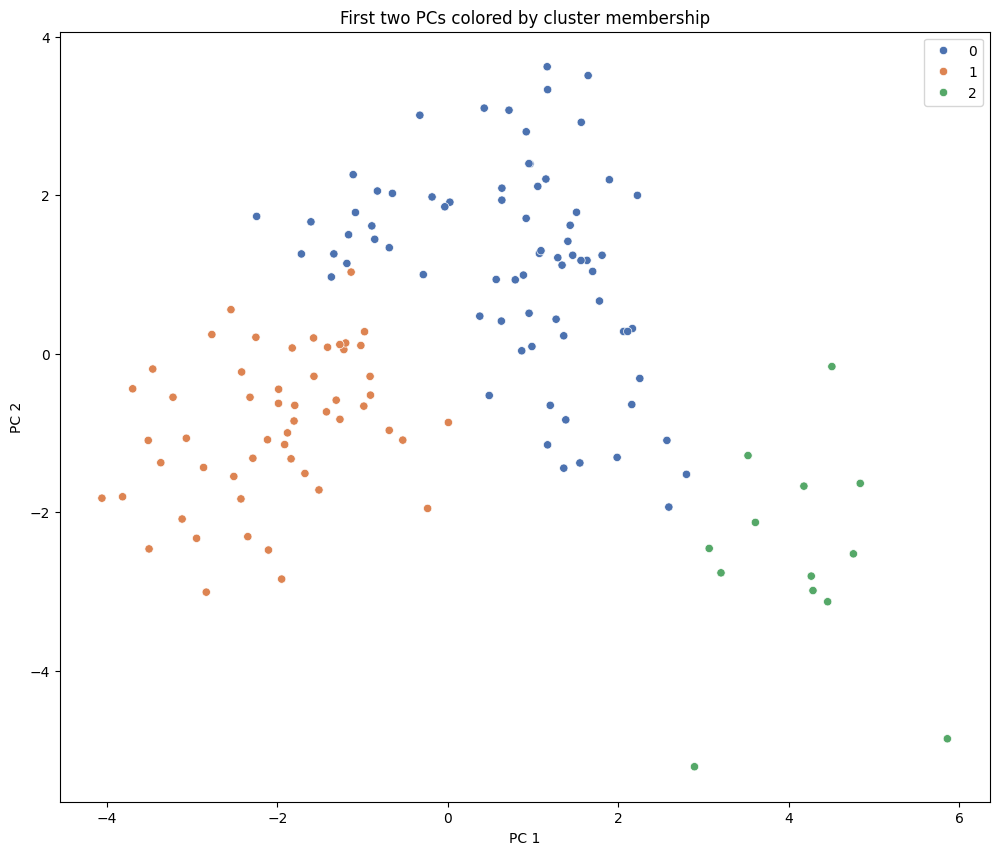

In [122]:
# Plot first two PCs with cluster assignments
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=aggClusters, palette='deep')
plt.title("First two PCs colored by cluster membership")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [123]:
# Group by cluster membership
X_clusters = X.copy()
X_clusters.drop(columns=catCols, inplace=True)
X_clusters["ClusterNumber"] = aggClusters
X_clusters.groupby("ClusterNumber").mean().T

ClusterNumber,0,1,2
pct_attendance,9.236713e+01,88.801428,8.972821e+01
pct_chronically_absent,2.463957e+01,38.953080,3.039653e+01
num_evictions,5.307534e+02,2558.518519,6.038462e+02
median_sale_price,1.398317e+06,858133.279970,8.262951e+06
hvi,7.581403e+05,580357.823685,1.912305e+06
total_population,3.884204e+03,4080.012918,5.793587e+03
median_income,4.022243e+04,29455.269196,8.812154e+04
white_pct,5.225428e+01,21.793403,7.627626e+01
black_pct,8.540468e+00,47.758984,4.270955e+00
american_indian_alaska_native_pct,4.521476e-01,0.480712,1.556915e-01


### K-Means Clustering

In [124]:
# Fit k means clustering model with various number of clusters
silhouetteScores = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusterLabels = kmeans.fit_predict(X_pca)
    silhouetteScore = silhouette_score(X_pca, clusterLabels)
    silhouetteScores.append(silhouetteScore)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouetteScore)
    
# Report clustering with best silhouette score
print("The best silhouette score is", max(silhouetteScores),
        "using", silhouetteScores.index(max(silhouetteScores)) + 2, "clusters")

For n_clusters = 2 The average silhouette_score is : 0.3155425408583552
For n_clusters = 3 The average silhouette_score is : 0.33948574227452555
For n_clusters = 4 The average silhouette_score is : 0.35569983476350087
For n_clusters = 5 The average silhouette_score is : 0.34398110956925326
For n_clusters = 6 The average silhouette_score is : 0.3555555482782343
For n_clusters = 7 The average silhouette_score is : 0.341233351640567
The best silhouette score is 0.35569983476350087 using 4 clusters


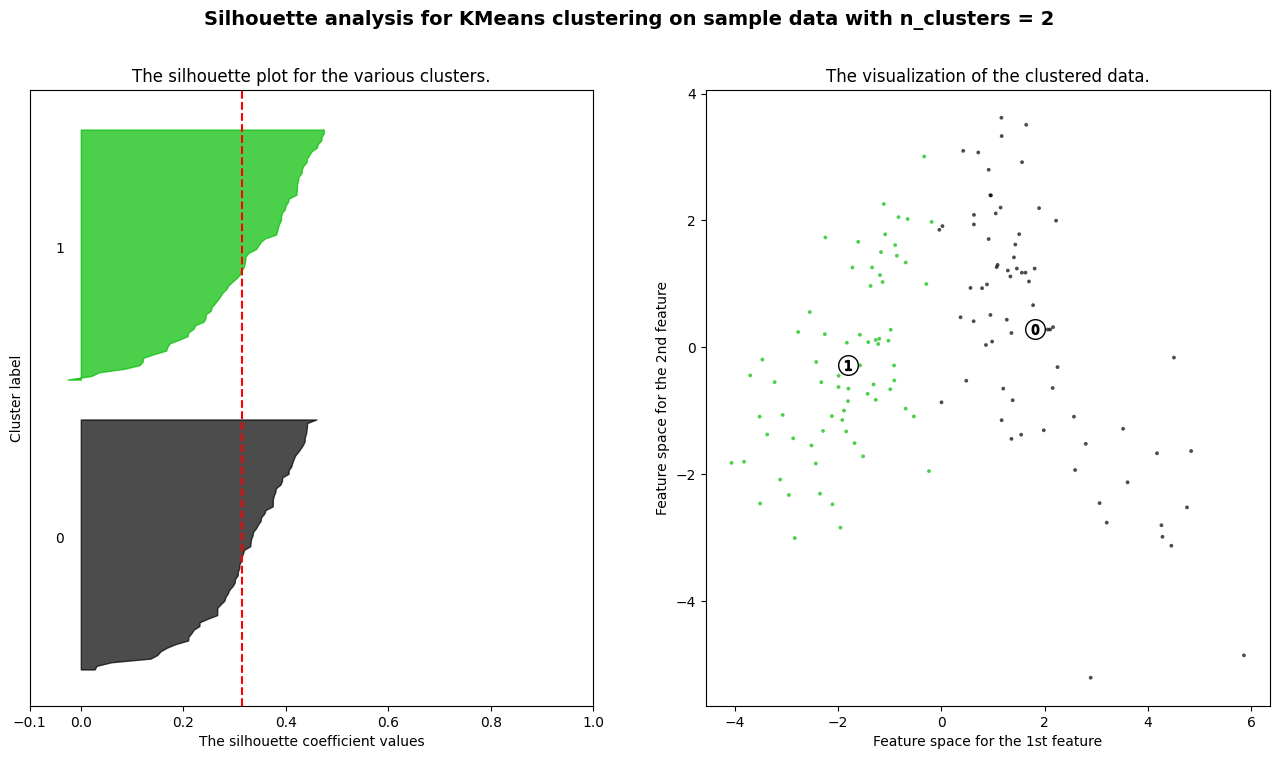

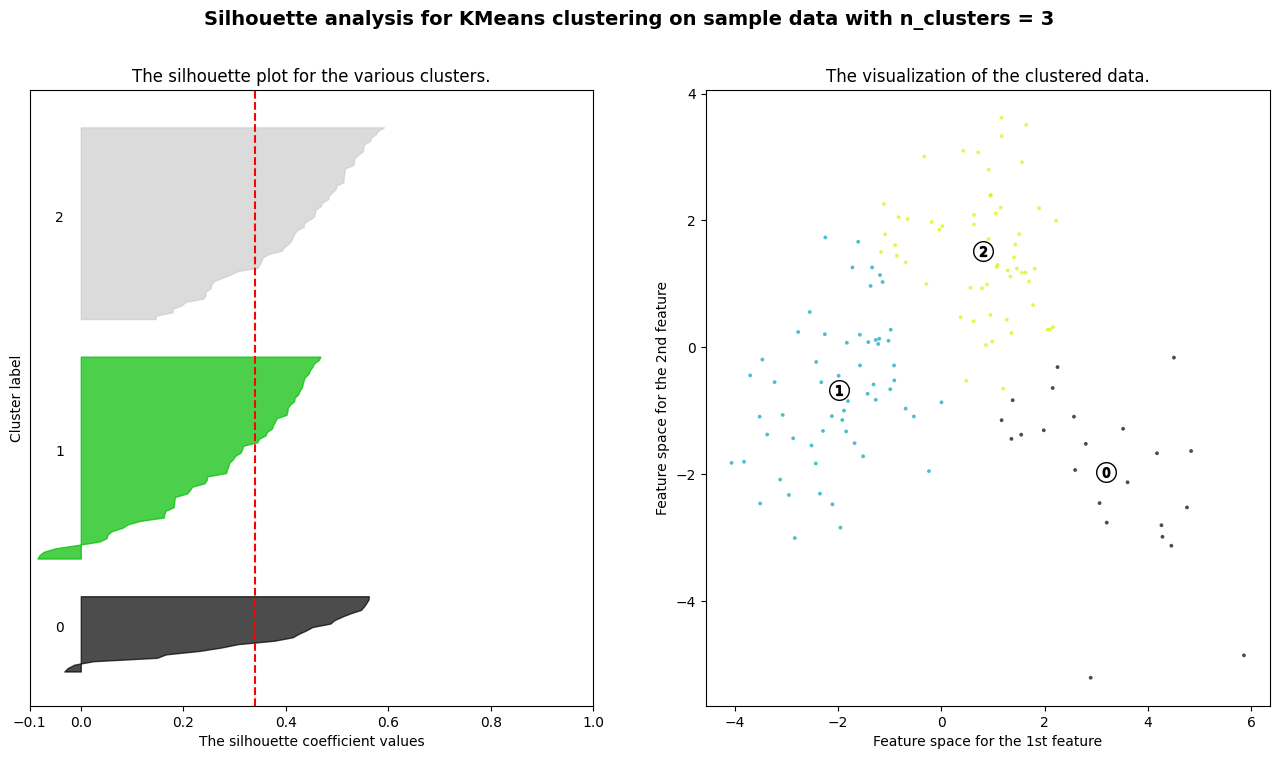

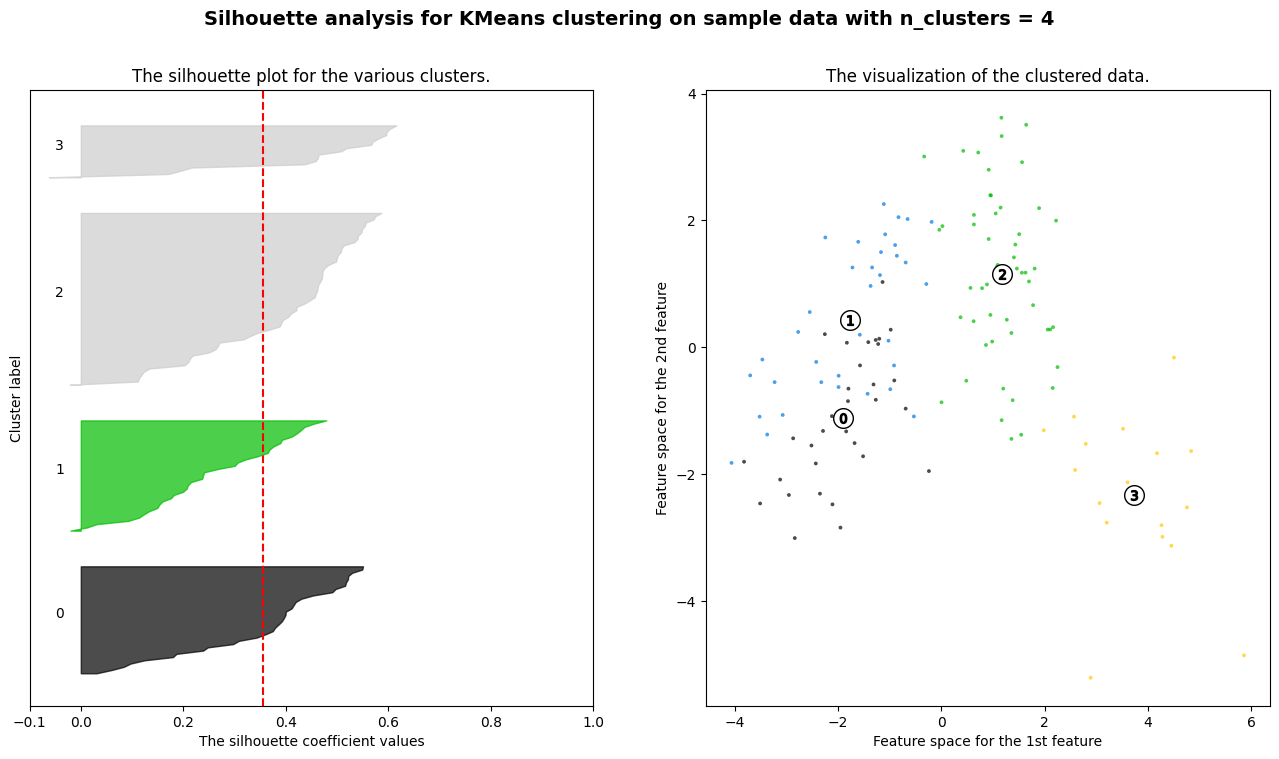

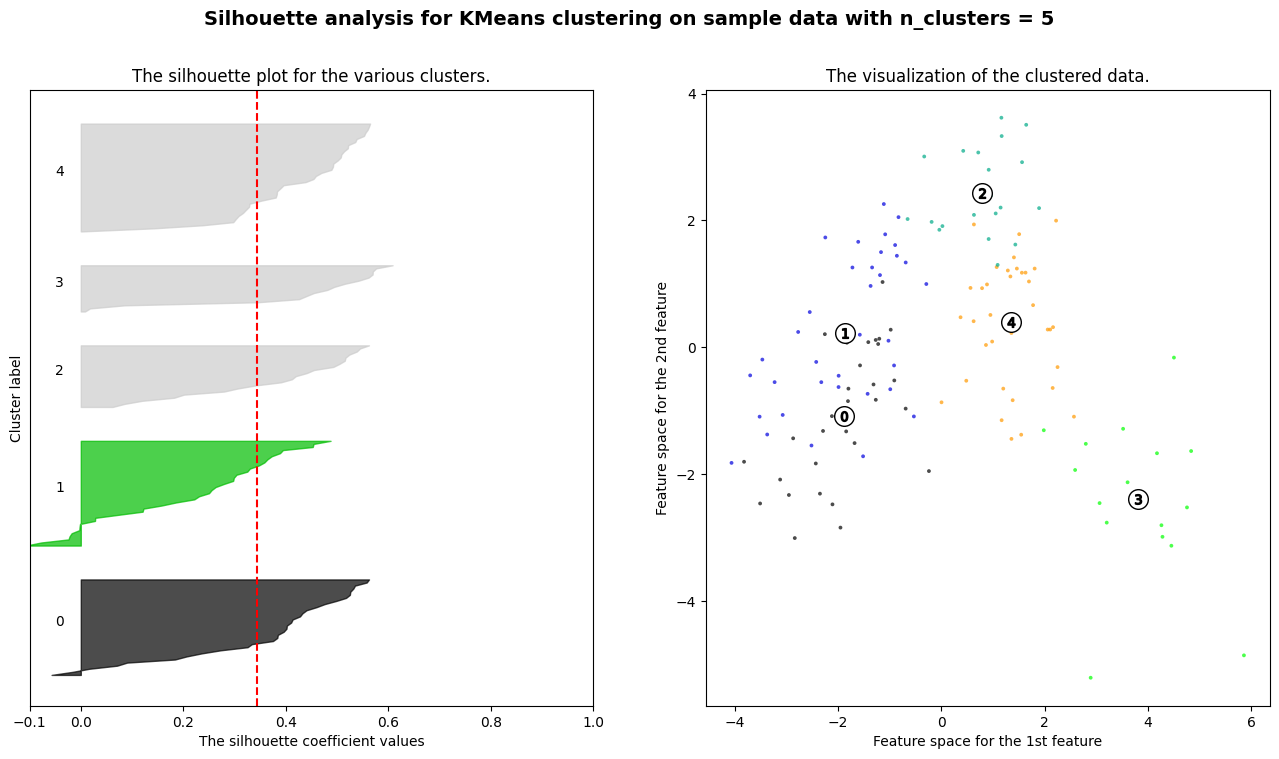

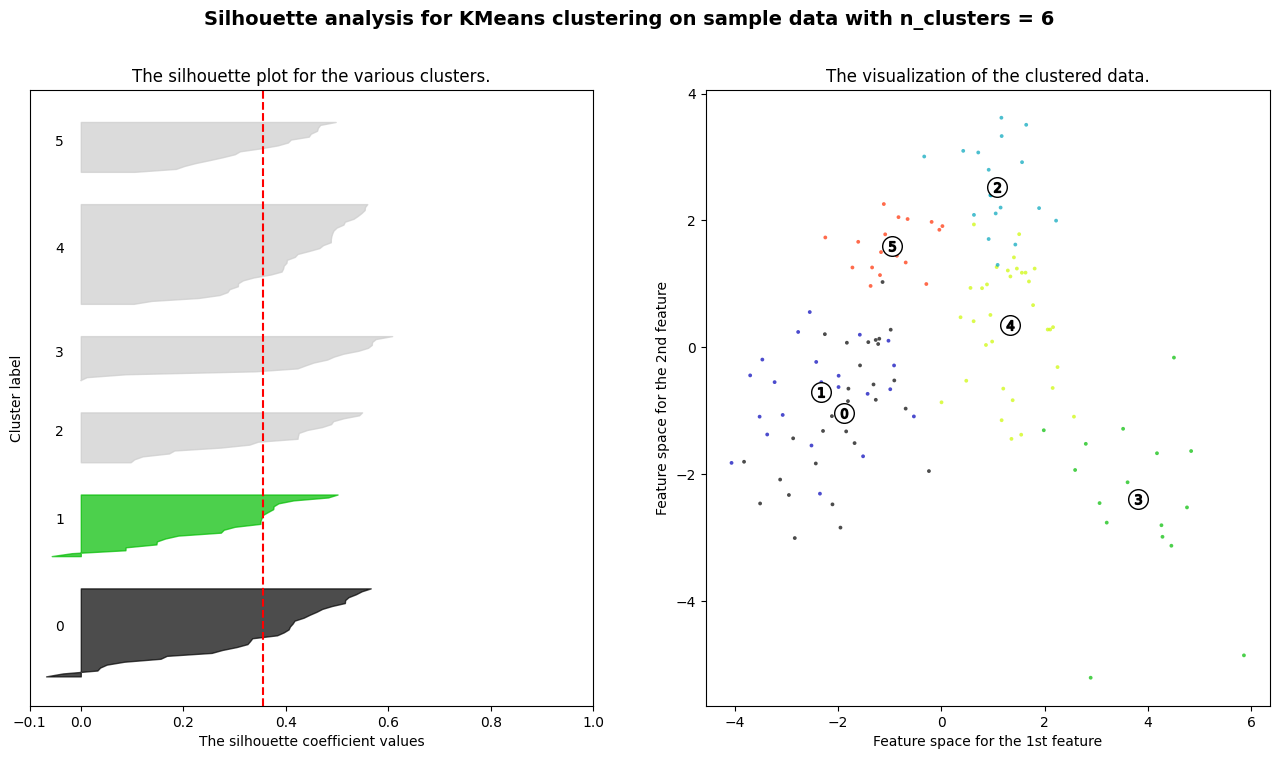

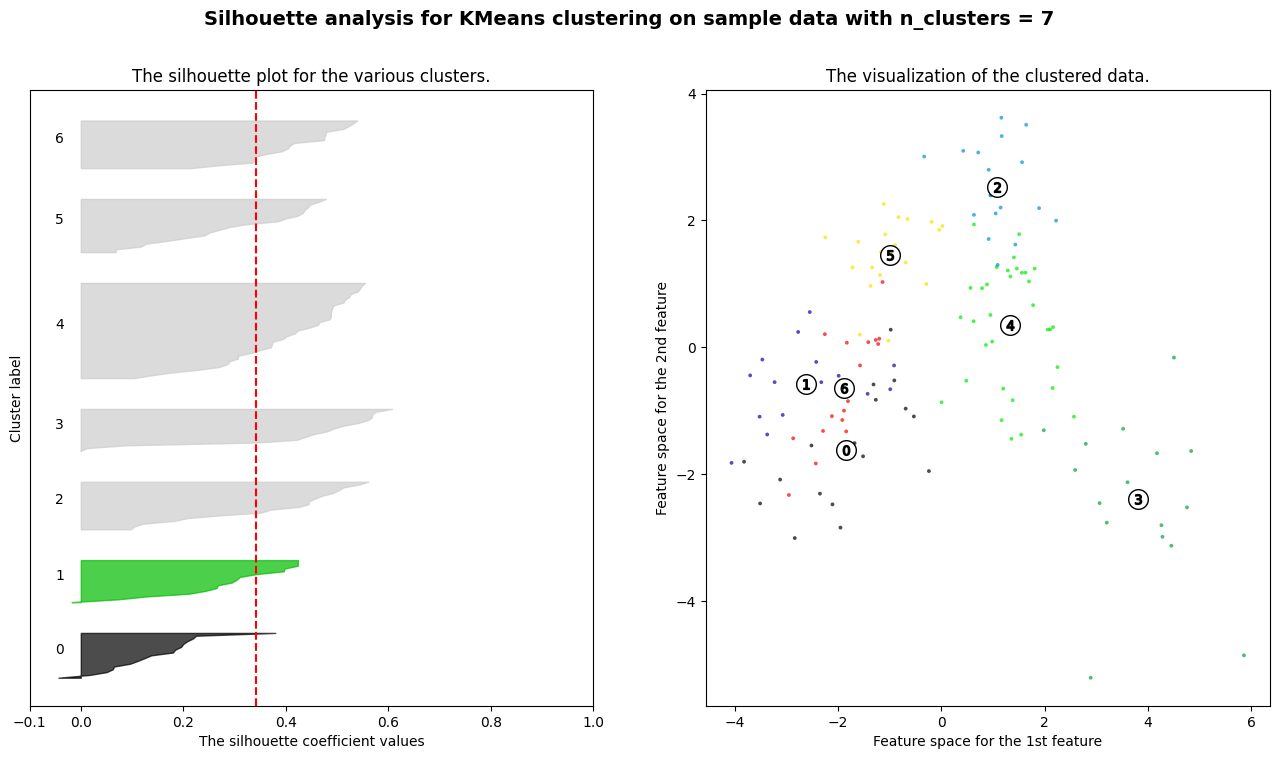

In [125]:
# Silhouette plots to determine optimal number of clusters: modified from lecture code
for n_clusters in range(2, 8):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    clusterLabels = km.fit_predict(X_pca)
    avgSilOpt = silhouette_score(X_pca, clusterLabels)
    sampleSilVals = silhouette_samples(X_pca, clusterLabels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sampleSilVals[clusterLabels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 2)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=avgSilOpt, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusterLabels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    f"with n_clusters = {n_clusters}"),
                    fontsize=14, fontweight='bold')

    plt.show()

In [126]:
# Group by cluster membership
X_km= X.copy()
X_km.drop(columns=catCols, inplace=True)
X_km["Cluster"] = clusterLabels
X_km.groupby("Cluster").mean().T

Cluster,0,1,2,3,4,5,6
pct_attendance,8.730597e+01,89.550320,9.426406e+01,8.963781e+01,9.173637e+01,91.778485,89.457600
pct_chronically_absent,4.359518e+01,36.906790,1.708695e+01,3.108733e+01,2.684219e+01,28.154304,36.564346
num_evictions,3.260471e+03,3295.750000,2.952778e+02,6.078125e+02,5.374000e+02,773.800000,1515.000000
median_sale_price,1.007098e+06,862643.368847,1.272624e+06,7.891384e+06,1.315279e+06,841569.113618,715344.860750
hvi,6.782502e+05,469301.133399,7.374387e+05,1.755347e+06,8.271376e+05,593493.068655,573629.257587
total_population,3.863366e+03,5249.362509,3.785171e+03,5.627518e+03,3.770530e+03,4079.835106,3209.921839
median_income,3.090180e+04,22708.895143,3.573499e+04,8.295061e+04,4.518335e+04,30807.333897,34206.979880
white_pct,3.252094e+01,21.978940,4.482255e+01,7.480454e+01,6.935899e+01,25.544138,7.575170
black_pct,4.243521e+01,27.142563,5.004166e+00,4.654443e+00,6.354402e+00,16.435935,77.034068
american_indian_alaska_native_pct,4.232115e-01,0.694031,5.174276e-01,1.454212e-01,2.059748e-01,0.888860,0.336855
